In [29]:
!pip install rapidfuzz
!pip install jmespath

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 393.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.7 MB 737.3 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 1.3 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.7 MB 2.0 MB/s eta 0:00:01
   --------------------- ------------------ 0.9/1.7 MB 3.1 MB/s eta 0:00:01
   ------------------------------------ --- 1.5/1.7 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.8 MB/s eta 0:00:00


Error processing line 1 of C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\zope.interface-7.1.1-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\USER\anaconda3\envs\pytorch\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
!pip install transformers[all]


     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
      --------------------------------------- 0.0

Error processing line 1 of C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\zope.interface-7.1.1-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\USER\anaconda3\envs\pytorch\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

In [46]:
import pandas as pd
import re
from datasets import load_dataset
from rapidfuzz import process, fuzz
from tqdm import tqdm  # 用於顯示進度條

# 加載 Djinni Recruitment Dataset (English Job Descriptions part)
data = load_dataset("lang-uk/recruitment-dataset-job-descriptions-english")['train']
df = data.to_pandas()

# 改進的清理職位名稱函數
def clean_position(position):
    # 移除開頭的數字和特殊字符
    position = re.sub(r"^\d+[^\w]*", "", position)  # 處理開頭數字或非單詞字符
    position = re.sub(r"^\d+[\s/]*", "", position)  # 開頭數字後接空格或斜線
    # 移除括號中的內容
    position = re.sub(r"\(.*?\)", "", position)
    # 移除多餘的特殊字符
    position = re.sub(r"[^\w\s/]", "", position)
    # 壓縮多個空格為單個空格
    position = re.sub(r"\s+", " ", position).strip()
    return position

# 應用清理函數
tqdm.pandas(desc="Cleaning Positions")
df['Cleaned Position'] = df['Position'].progress_apply(clean_position)

# 進行標準化處理
unique_positions = df['Cleaned Position'].unique()
standardized_names = []
for position in tqdm(unique_positions, desc="Generating Standardized Names"):
    if any(fuzz.ratio(position, std) > 80 for std in standardized_names):
        continue
    standardized_names.append(position)

mapping = {}
for position in tqdm(unique_positions, desc="Creating Mapping"):
    match, score, _ = process.extractOne(position, standardized_names, scorer=fuzz.ratio)
    if score > 90:
        mapping[position] = match
    else:
        mapping[position] = position

tqdm.pandas(desc="Standardizing Positions")
df['Standardized Position'] = df['Cleaned Position'].progress_apply(lambda x: mapping.get(x, x))

# 查看結果
print(df[['Cleaned Position', 'Standardized Position']].head(20))


Standardizing Positions: 100%|████████████| 141897/141897 [00:00<00:00, 508911.40it/s]

                            Cleaned Position  \
0   Blockchain Nodes / Masternodes to set up   
1                             NET Developers   
2                                 X Engineer   
3                       Amazon Brand Manager   
4                       Amazon Brand Manager   
5                              PHP Developer   
6                              Sales Manager   
7       Middle / Senior marketing specialist   
8               Business Development Manager   
9                  Middle DataBase developer   
10              Lead/Senior Backend Engineer   
11                     Senior Java Developer   
12         Trainee/Junior Database developer   
13                   Middle Python Developer   
14            Junior Ruby on Rails Developer   
15                           DevOps Engineer   
16             Senior Java Software Engineer   
17       Middle Java Developer Welcome Bonus   
18                           C/Baf developer   
19                                 C bas

In [50]:
# 保存清理並標準化後的數據集為 CSV 文件
output_path = "standardized_djinni_recruitment_dataset.csv"
df.to_csv(output_path, index=False)

# 打印保存完成信息
print(f"清理並標準化後的數據集已成功保存為: {output_path}")

清理並標準化後的數據集已成功保存為: standardized_djinni_recruitment_dataset.csv


C:\Users\USER\AppData\Local\Temp\ipykernel_19708\1279543402.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.values, y=position_counts.index, palette="viridis")


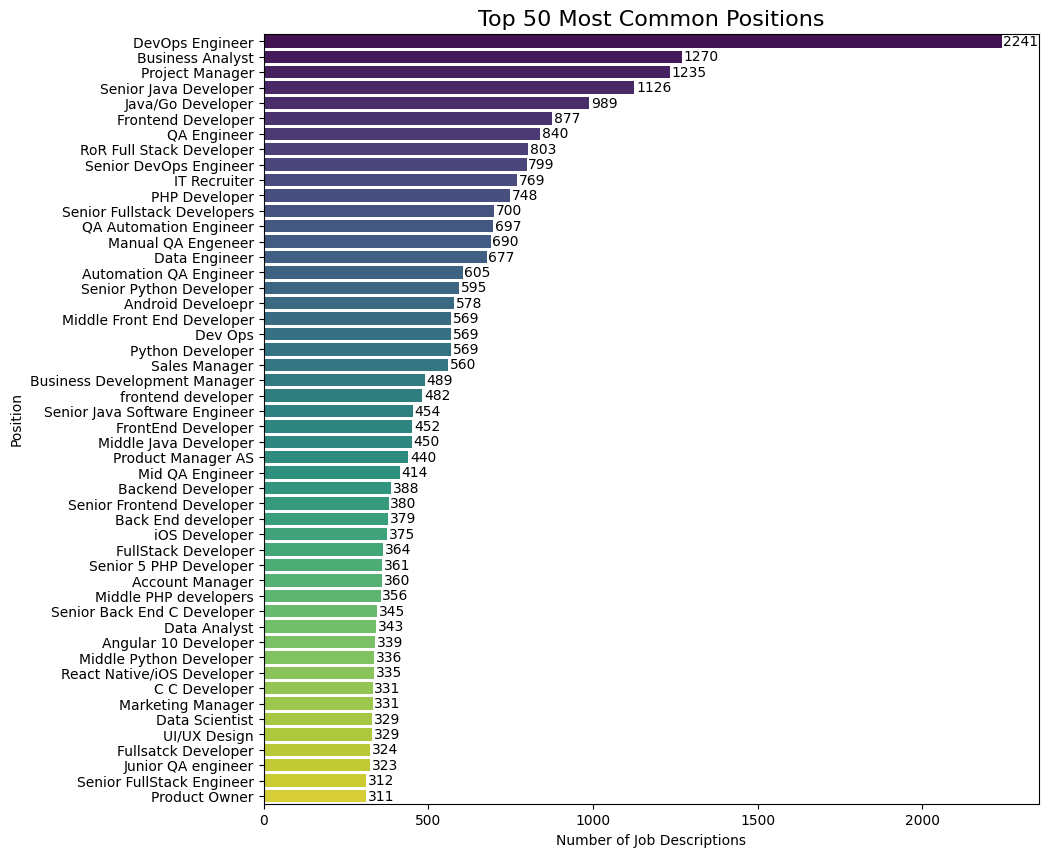

總職位數量: 141897
清理後的唯一職位數量: 49376
標準化後的唯一職位數量: 43861


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算職位名稱的分佈
position_counts = df['Standardized Position'].value_counts().head(50)

# 繪製條形圖
plt.figure(figsize=(10, 10))
sns.barplot(x=position_counts.values, y=position_counts.index, palette="viridis")
plt.title("Top 50 Most Common Positions", fontsize=16)
plt.xlabel("Number of Job Descriptions")
plt.ylabel("Position")
# 添加數值標籤
for index, value in enumerate(position_counts.values):
    plt.text(value + 5, index, str(value), va='center')  # 調整位置
plt.show()


# 總職位數量
total_positions = df['Position'].count()
print(f"總職位數量: {total_positions}")
# 唯一職位數量（清理後）
unique_cleaned_positions = df['Cleaned Position'].nunique()
print(f"清理後的唯一職位數量: {unique_cleaned_positions}")
# 唯一職位數量（標準化後）
unique_standardized_positions = df['Standardized Position'].nunique()
print(f"標準化後的唯一職位數量: {unique_standardized_positions}")

C:\Users\USER\AppData\Local\Temp\ipykernel_19708\1779441369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.values, y=company_counts.index, palette="plasma")


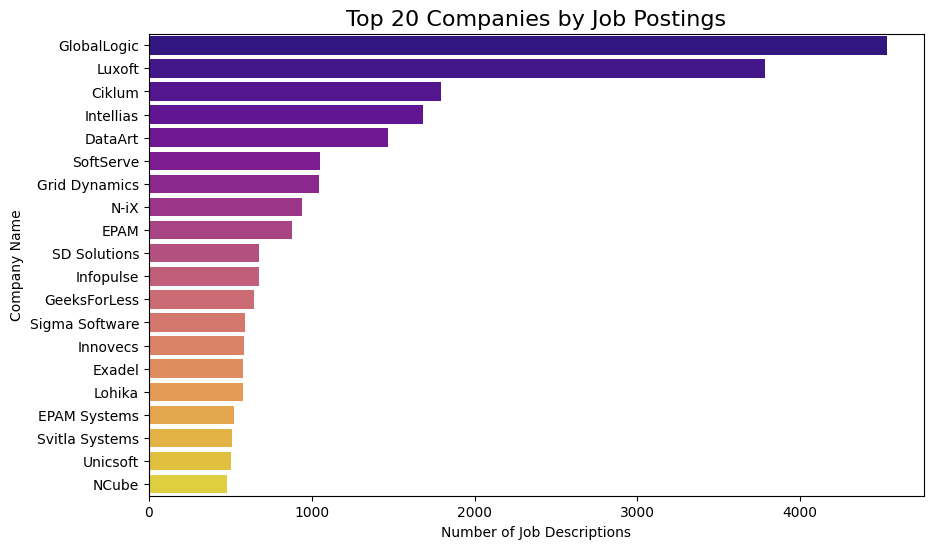

總公司數量: 141897


In [52]:
# 計算公司名稱的分佈
company_counts = df['Company Name'].value_counts().head(20)

# 繪製條形圖
plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.values, y=company_counts.index, palette="plasma")
plt.title("Top 20 Companies by Job Postings", fontsize=16)
plt.xlabel("Number of Job Descriptions")
plt.ylabel("Company Name")
plt.show()
# 總職位數量
Total_Company= df['Company Name'].count()
print(f"總公司數量: {Total_Company}")


C:\Users\USER\AppData\Local\Temp\ipykernel_19708\4063155048.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_counts.values, y=keyword_counts.index, palette="cubehelix")


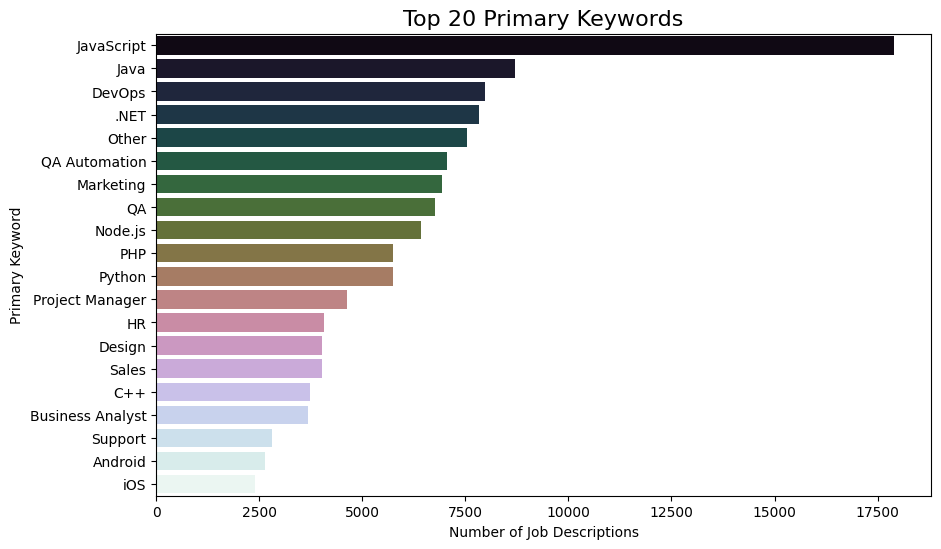

In [53]:
# 計算關鍵詞的分佈
keyword_counts = df['Primary Keyword'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=keyword_counts.values, y=keyword_counts.index, palette="cubehelix")
plt.title("Top 20 Primary Keywords", fontsize=16)
plt.xlabel("Number of Job Descriptions")
plt.ylabel("Primary Keyword")
plt.show()


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# 清理職位描述
def clean_description(text):
    text = re.sub(r'\d+', '', text)  # 移除數字
    text = re.sub(r'[^\w\s]', '', text)  # 移除標點符號
    text = re.sub(r'\s+', ' ', text).strip()  # 移除多餘空格
    return text
    
tqdm.pandas(desc="Cleaning Descriptions")
df['Cleaned Description'] = df['Long Description'].progress_apply(clean_description)
df['Cleaned Description'] 

Cleaning Descriptions: 100%|████████████████| 141897/141897 [00:48<00:00, 2938.21it/s]


0         Requirements Were looking for a long term coll...
1         Greetings My name is Maria I am in urgent need...
2         Product The product is a live video chat and c...
3         Currently TCM expanding its activities to Ukra...
4         Hello We MIMIRBB are an outstaff company and n...
                                ...                        
141892    We are looking for a highly motivated and resu...
141893    We are looking for an experienced targetologis...
141894    Responsibilities Analyze and estimate implemen...
141895    Duties and Responsibilities HelpdDeliver a hig...
141896    We are looking for a talented and brilliant De...
Name: Cleaned Description, Length: 141897, dtype: object

In [59]:
# 保存清理並標準化後的數據集為 CSV 文件
output_path = "Cleaned_Description_dataset.csv"
df.to_csv(output_path, index=False)

# 打印保存完成信息
print(f"清理並標準化後的數據集已成功保存為: {output_path}")

清理並標準化後的數據集已成功保存為: Cleaned_Description_dataset.csv


In [72]:
import spacy
from tqdm import tqdm

# 加載 SpaCy 模型
nlp = spacy.load("en_core_web_sm")

# 初始化 tqdm 進度條
tqdm.pandas(desc="Extracting Named Entities")

# 提取命名實體
def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in {"ORG", "PRODUCT", "PERSON", "GPE"}]
                                     
df['Named Entities'] = df['Cleaned Description'].progress_apply(extract_named_entities)
print(df['Named Entities'])


Extracting Named Entities: 100%|████████████| 141897/141897 [3:26:39<00:00, 11.44it/s]

0                           [(Thorchain Succesful, PERSON)]
1         [(Maria, PERSON), (Sweden, GPE), (ASP, ORG), (...
2         [(Google, ORG), (US, GPE), (Team Daniel Founde...
3         [(Ukraine, GPE), (Kiev, GPE), (Responsibilitie...
4         [(Amazon Brand, ORG), (Responsibilities Analyz...
                                ...                        
141892    [(Advertising Specialist, ORG), (Meta, ORG), (...
141893    [(Responsibilities Creating, PRODUCT), (Instag...
141894    [(JavaScript, ORG), (Participate, ORG), (Javas...
141895                   [(Skills and Qualifications, ORG)]
141896    [(DevOps Cloud Architect, PRODUCT), (RD, ORG),...
Name: Named Entities, Length: 141897, dtype: object


In [73]:
# 將結果保存到 CSV 文件
output_path = "named_entities.csv"
df[['Cleaned Description', 'Named Entities']].to_csv(output_path, index=False)

print(f"命名實體已成功保存到: {output_path}")

命名實體已成功保存到: named_entities.csv


In [74]:
# 展開 Named Entities 列，將每個實體單獨存儲
expanded_entities = []
for index, row in df.iterrows():
    for entity, label in row['Named Entities']:
        expanded_entities.append({
            "Cleaned Description": row['Cleaned Description'],
            "Entity": entity,
            "Label": label
        })

# 保存到 CSV
expanded_df = pd.DataFrame(expanded_entities)
output_path = "expanded_named_entities.csv"
expanded_df.to_csv(output_path, index=False)

print(f"展開的命名實體已成功保存到: {output_path}")


展開的命名實體已成功保存到: expanded_named_entities.csv


# 職位推薦系統
### 目標：根據求職者的技能、經歷和興趣，推薦合適的職位。
### 技術：
    利用 Standardized Position 作為分類標籤。
    使用 NLP 提取職位描述中的技能關鍵詞。
    使用語義匹配（如基於 Transformer 的模型，如 BERT）將求職者資料與職位進行匹配。
### 資料來源:
    從網路上面爬取 ,Djinni Recruitment Dataset

# 技能需求分析
### 目標：分析最熱門的技能需求，幫助企業了解市場趨勢。
### 技術：
    從職位描述中提取技能關鍵詞（如 Python、React、Java 等）。
    計算每種技能的出現頻率並生成可視化。
### 資料來源:
    網路上爬取  ,Djinni Recruitment Dataset

# 市場需求趨勢分析
### 目標：根據時間維度分析職位需求的變化趨勢。
### 技術：
    使用職位的發布時間 (Published) 作為時間序列數據。
    分析特定職位（如 DevOps Engineer）的需求隨時間的變化。
### 資料來源:
    網路上爬取  ,Djinni Recruitment Dataset

# 求職者與職位匹配分數
### 目標：為每個求職者與特定職位計算匹配分數，方便篩選最佳候選人。
### 技術：
    使用語義匹配技術（如 cosine similarity）。
    建立基於職位描述和求職者履歷的特徵向量。

### 資料來源:
    網路上爬取  ,Djinni Recruitment Dataset

# 職位分類系統
### 目標：自動分類職位到標準化的類別中。
### 技術：
    使用標準化後的職位名稱 (Standardized Position) 作為標籤。
    訓練分類模型（如 Logistic Regression、Random Forest 或基於 BERT 的深度學習模型）。
### 資料來源:
    網路上爬取  ,Djinni Recruitment Dataset

# 簡歷解析與篩選
### 目標：從求職者的簡歷中提取結構化數據，並根據職位要求篩選簡歷。
### 技術：
    使用 NLP 技術（如 SpaCy、PyPDF2）解析簡歷。
    匹配簡歷中的技能和經驗與職位描述。
### 資料來源:
    網路上爬取  ,Djinni Recruitment Dataset

In [71]:
!pip install --upgrade setuptools wheel


  Using cached setuptools-75.3.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached setuptools-75.3.0-py3-none-any.whl (1.3 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.44.0
    Uninstalling wheel-0.44.0:
      Successfully uninstalled wheel-0.44.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0


Error processing line 1 of C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\zope.interface-7.1.1-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\USER\anaconda3\envs\pytorch\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confli

In [70]:
from spacy.util import require_gpu

# 啟用 GPU
if require_gpu():
    print("GPU 已成功啟用！")
else:
    print("無法啟用 GPU，請檢查您的配置。")


ImportError: cannot import name 'require_gpu' from 'spacy.util' (C:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\spacy\util.py)